# INSTALL PACKAGE

In [1]:
%pip install -r requirements_yolo.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Admin\Desktop\cvworkshop_try


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.13 torch-2.2.1+cpu CPU (12th Gen Intel Core(TM) i9-12900KS)
Setup complete ✅ (24 CPUs, 63.8 GB RAM, 681.1/894.0 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

_______________________________________________________________________________________________

# LOAD DATASET

In [5]:
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
os.chdir(datasets_dir)

from roboflow import Roboflow
rf = Roboflow(api_key="f5pOg5frjQ3XAImBbLxX")
project = rf.workspace("ravensburgweingarten").project("dog_cat-test")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dog_Cat-Test-1 in yolov8:: 100%|██████████| 776/776 [00:00<00:00, 1617.02it/s]


## Fix data.yaml

1. in datasets/Dog_Cat-Test-1 <br>
2. go to data.yaml <br>
3. change 2 parameter as follow: <br>
     train: train/images <br>
     val: valid/images <br>

_______________________________________________________________________________________________

# TRAIN MODEL

In [7]:
%cd {HOME}
data_path= f"{dataset.location}/data.yaml"
print(data_path)

c:\Users\Admin\Desktop\cvworkshop_try
c:\Users\Admin\Desktop\cvworkshop_try\datasets\Dog_Cat-Test-1/data.yaml


In [8]:
#check GPU
import torch
torch.cuda.is_available()

False

In [17]:
%cd {HOME}

model = YOLO("yolov8n.yaml")
results = model.train(data= os.path.join(dataset.location, 'data.yaml'), epochs=3, imgsz=640, plots=True)

#this is the one run on colab !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=1 imgsz=640 plots=True

This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


c:\Users\Admin\Desktop\cvworkshop_try
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.27 🚀 Python-3.10.13 torch-2.2.1+cpu CPU (12th Gen Intel Core(TM) i9-12900KS)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=c:\Users\Admin\Desktop\cvworkshop_try\datasets\Dog_Cat-Test-1\data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augme

train: Scanning C:\Users\Admin\Desktop\cvworkshop_try\datasets\Dog_Cat-Test-1\train\labels.cache... 321 images, 0 backgrounds, 0 corrupt: 100%|██████████| 321/321 [00:00<?, ?it/s]
val: Scanning C:\Users\Admin\Desktop\cvworkshop_try\datasets\Dog_Cat-Test-1\valid\labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<?, ?it/s]

Plotting labels to runs\detect\train\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      3.136      3.496      4.193          4        640: 100%|██████████| 21/21 [00:51<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         43         50    0.00357       0.92      0.116     0.0299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3         0G      3.149      3.524      4.116          1        640: 100%|██████████| 21/21 [00:50<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         43         50    0.00349        0.9       0.31     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      3.065      3.374      4.014          3        640: 100%|██████████| 21/21 [00:51<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         43         50    0.00341       0.88      0.196     0.0502

3 epochs completed in 0.045 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB


Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.13 torch-2.2.1+cpu CPU (12th Gen Intel Core(TM) i9-12900KS)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


                   all         43         50    0.00349        0.9        0.3     0.0582
Speed: 1.3ms preprocess, 43.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train


_______________________________________________________________________________________________

# EVALUATE MODEL

# This is Evaluation results
box loss, class loat

c:\Users\Admin\Desktop\cvworkshop_try


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


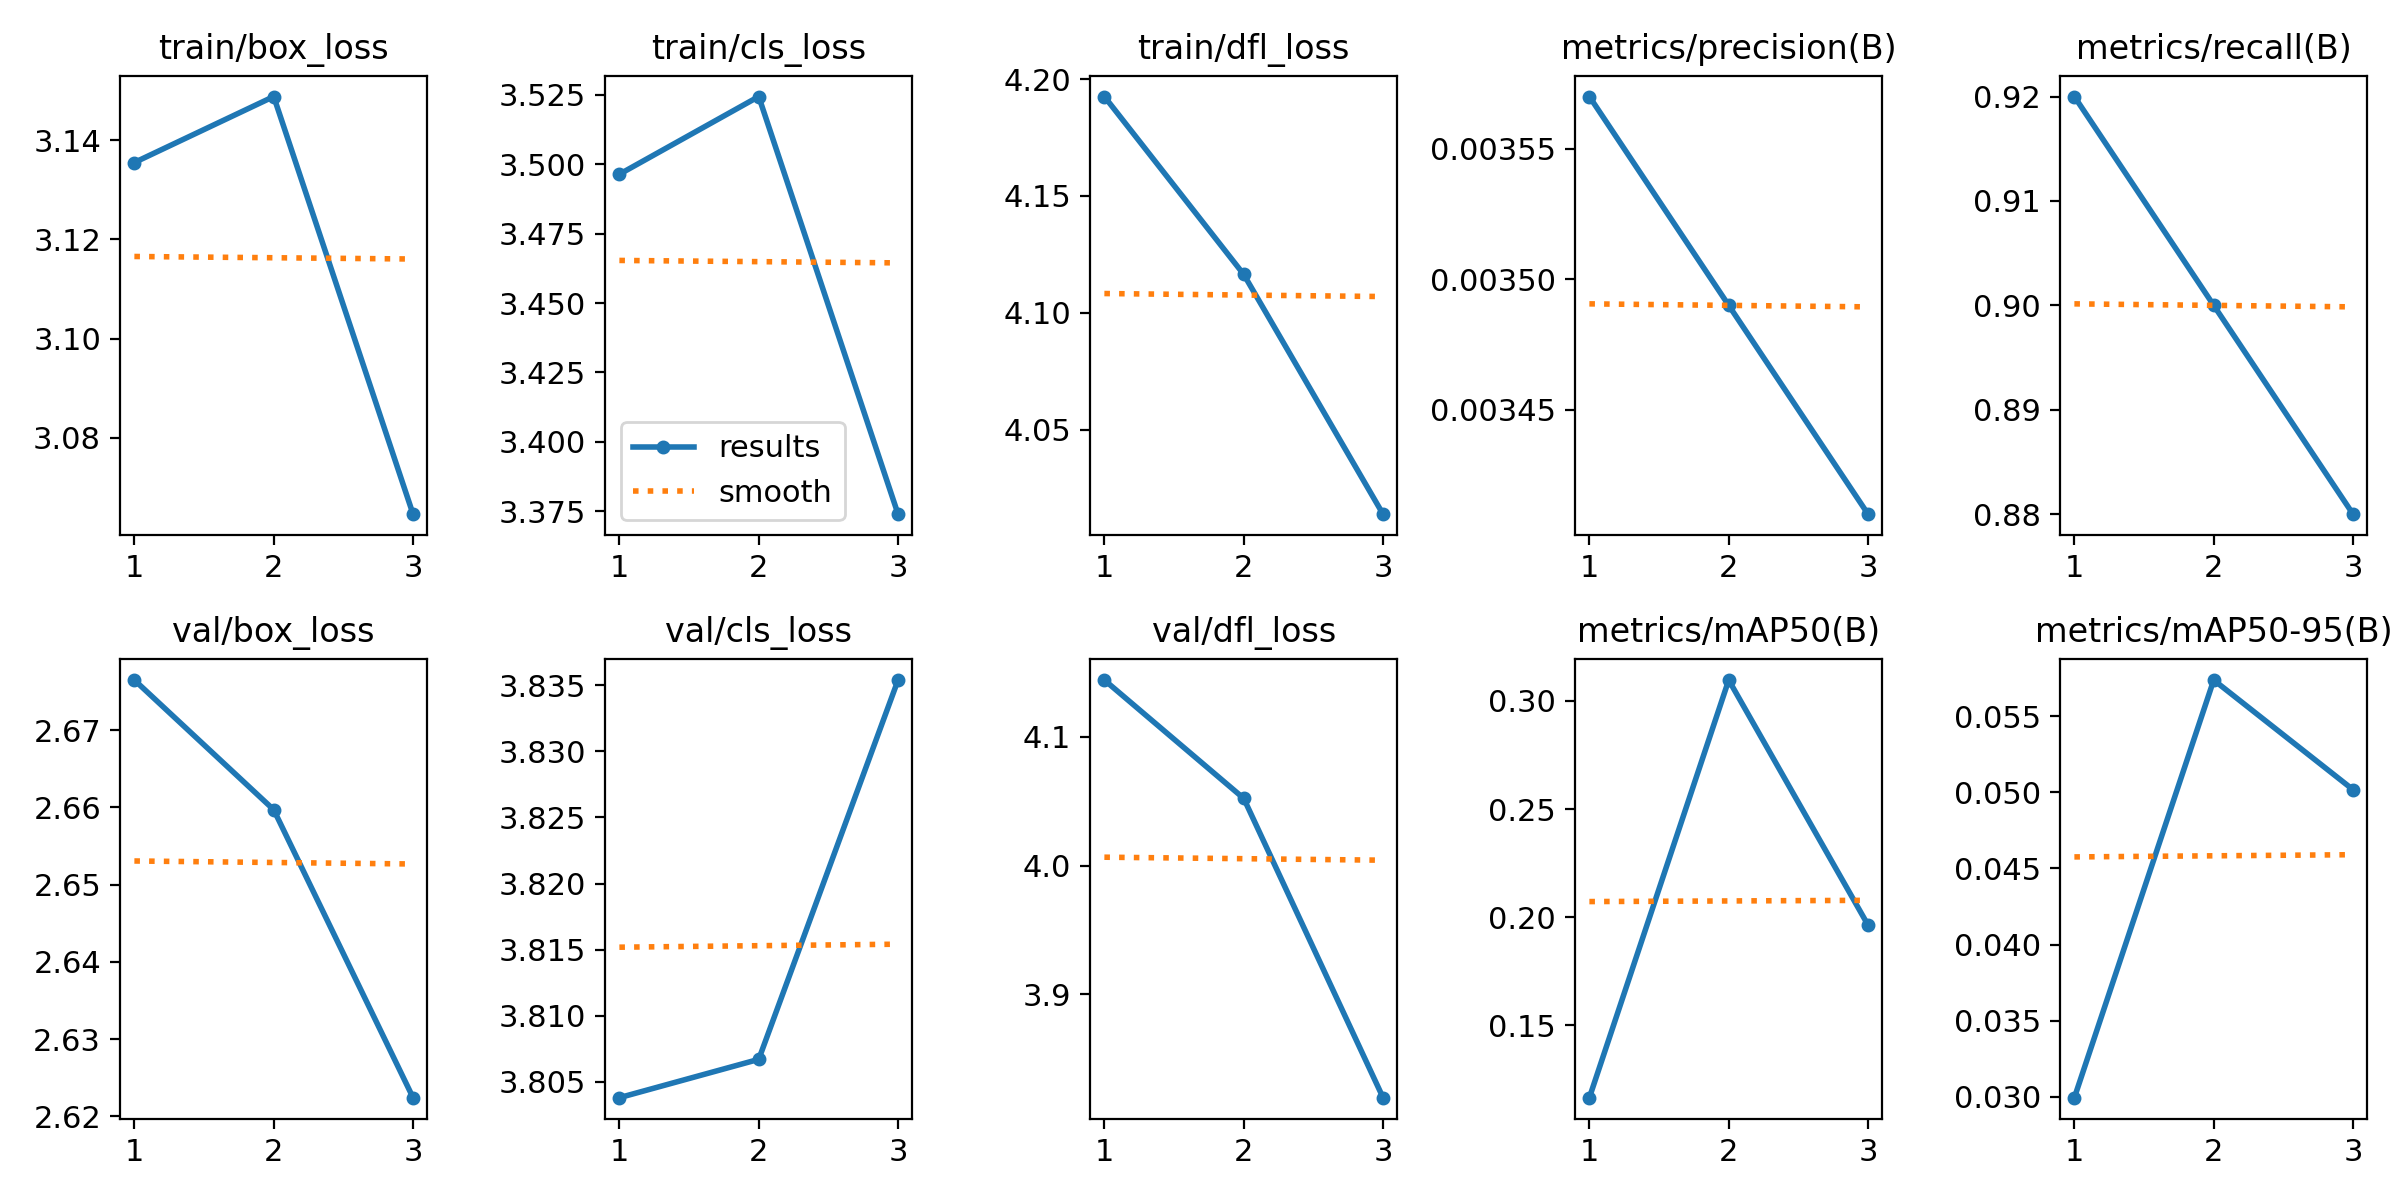

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## This is F1 Curve

c:\Users\Admin\Desktop\cvworkshop_try


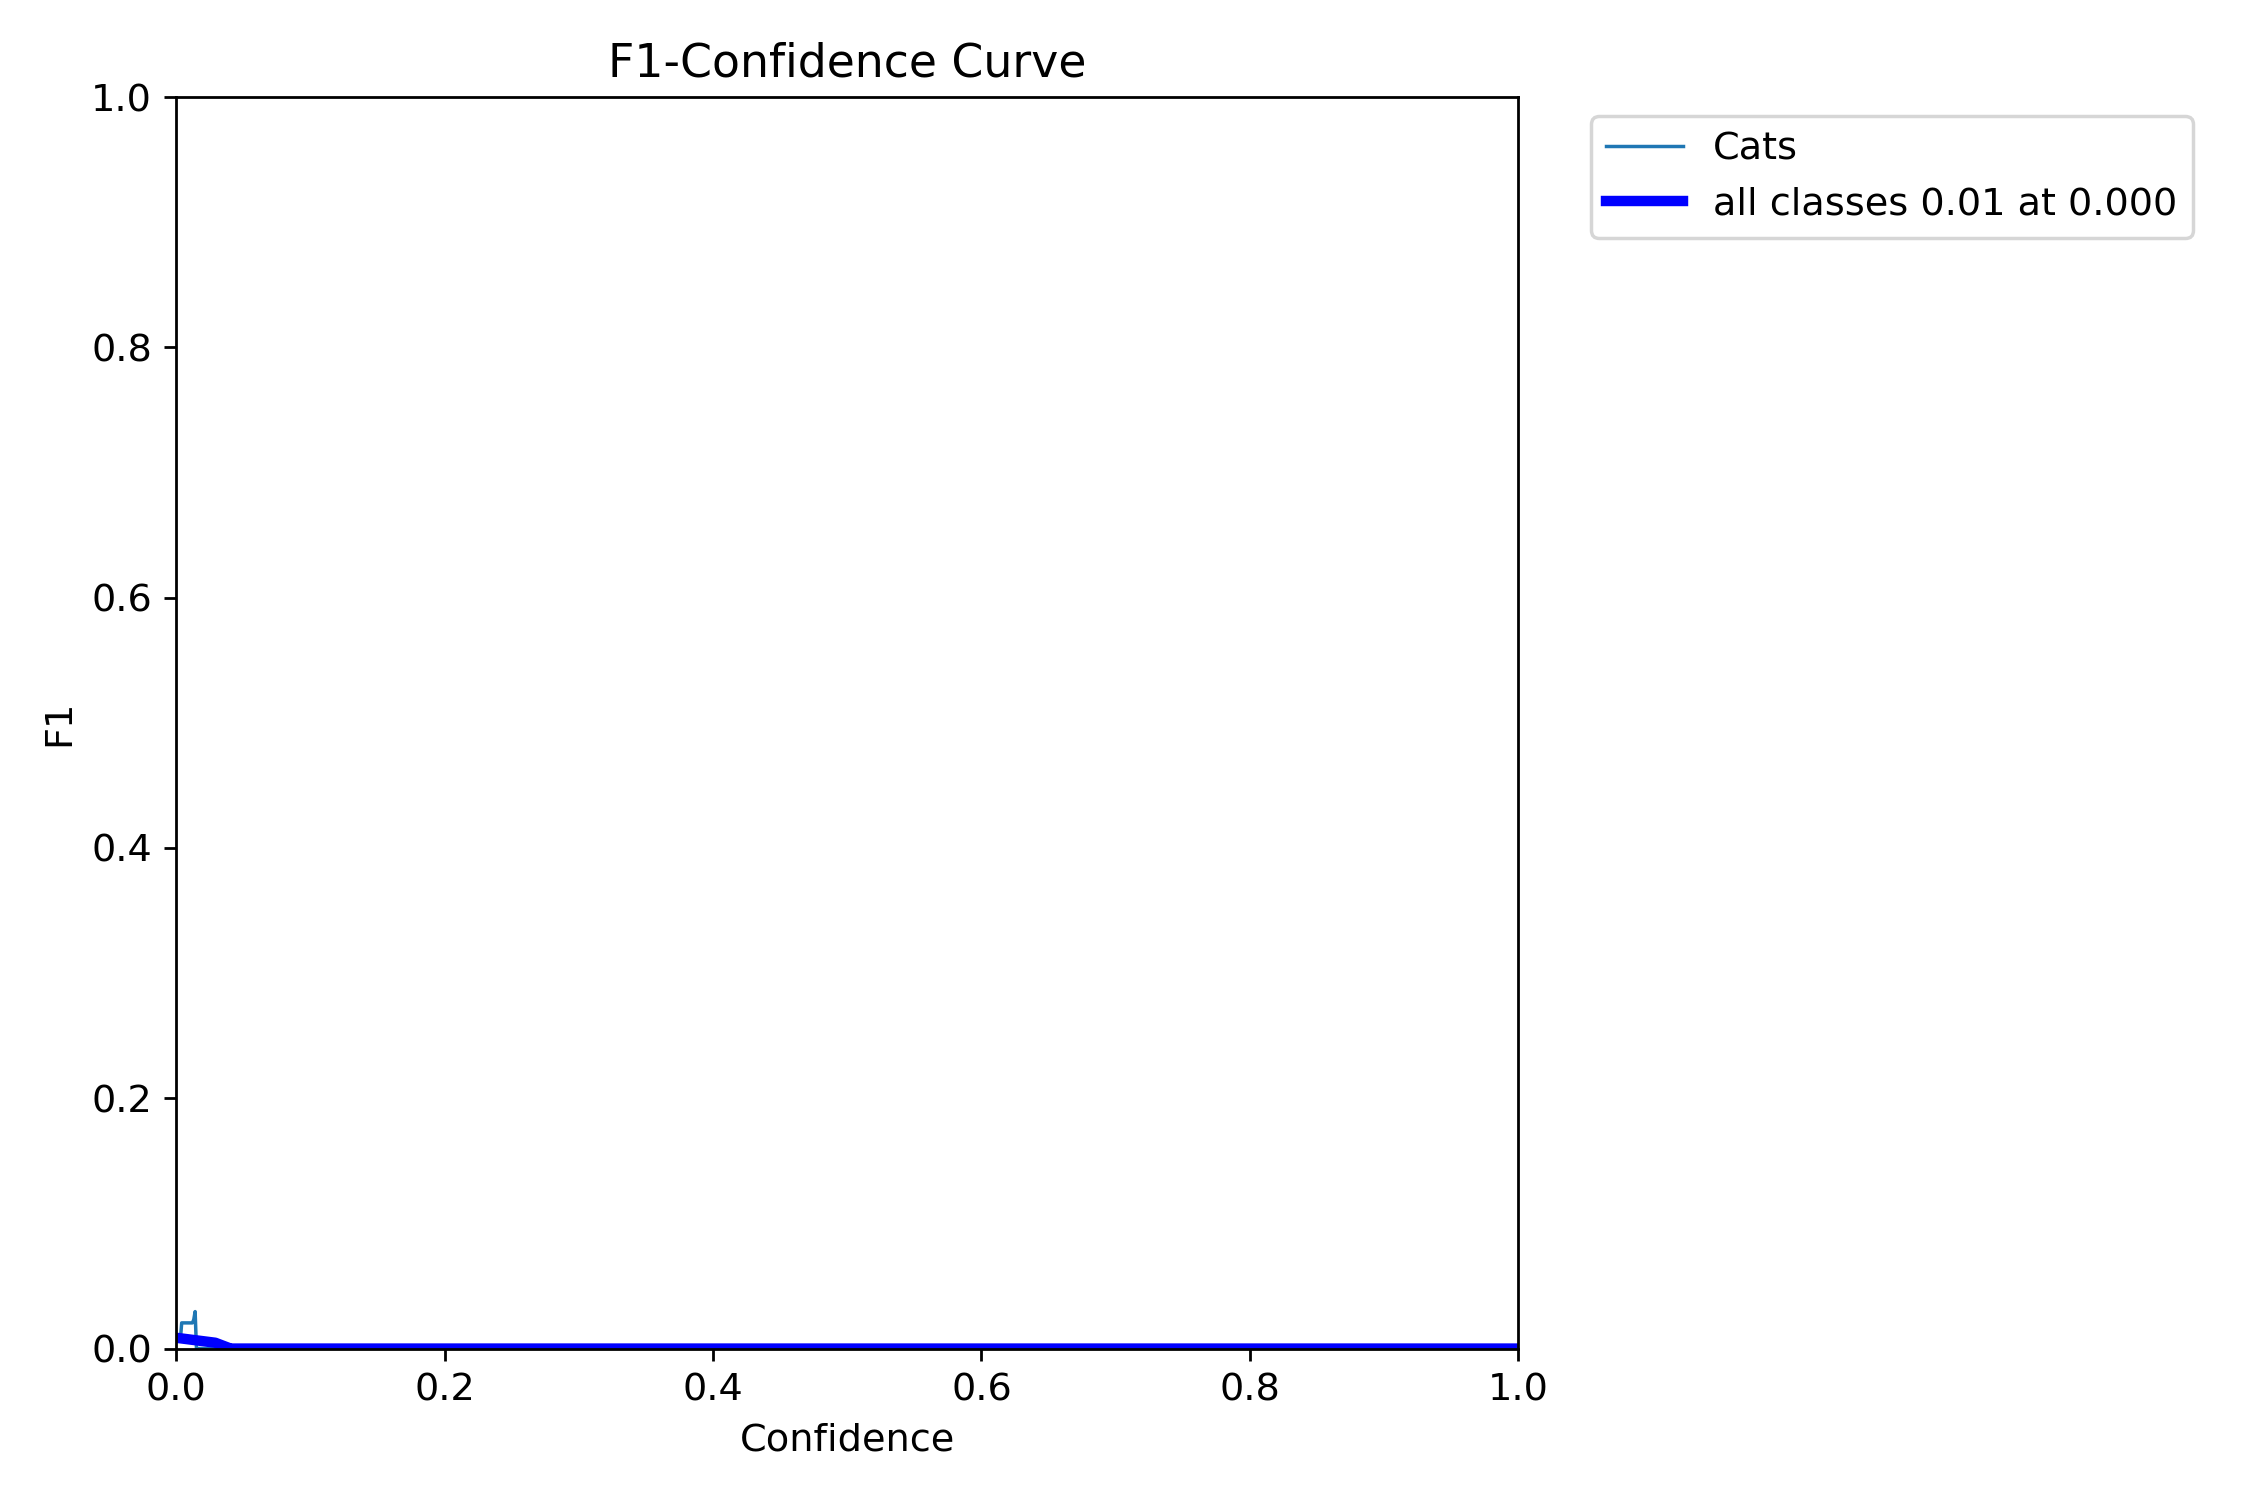

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

_______________________________________________________________________________________________

## TEST MODEL

In [20]:
#Load test image
test1 = f"{HOME}/datasets/Dog_Cat-Test-1/test/images/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg"
test2 = f"{HOME}/datasets/Dog_Cat-Test-1/test/images/0066-J3l4Zf33nfc_jpg.rf.383d5bcd3ef60f04ec23c8ffd36d69de.jpg"
print(test1)
print(test2)

c:\Users\Admin\Desktop\cvworkshop_try/datasets/Dog_Cat-Test-1/test/images/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg
c:\Users\Admin\Desktop\cvworkshop_try/datasets/Dog_Cat-Test-1/test/images/0066-J3l4Zf33nfc_jpg.rf.383d5bcd3ef60f04ec23c8ffd36d69de.jpg


## Test pt model

In [15]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model_1 = YOLO('yolov8n.pt')

# Run inference on an image
results_1 = model_1(test1)  # list of 1 Results object
for result in results_1:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen

100%|██████████| 6.23M/6.23M [00:00<00:00, 9.76MB/s]



image 1/1 c:\Users\Admin\Desktop\cvworkshop_try\datasets\Dog_Cat-Test-1\test\images\2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg: 640x640 1 cat, 51.5ms
Speed: 3.7ms preprocess, 51.5ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)


## Test our model

In [21]:
from ultralytics import YOLO

# Load a model
%cd {HOME}
model_path=f"{HOME}/runs/detect/train/weights/best.pt"

model_2 = YOLO(model_path)  # pretrained YOLOv8n model

# Run batched inference on a list of images
results_2 = model_2(test1)  # list of 1 Results object

# Process results list
for result in results_2:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
   

c:\Users\Admin\Desktop\cvworkshop_try

image 1/1 c:\Users\Admin\Desktop\cvworkshop_try\datasets\Dog_Cat-Test-1\test\images\2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg: 640x640 (no detections), 140.7ms
Speed: 0.0ms preprocess, 140.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
